In [1]:
import numpy as np

In [3]:
out = np.load('./features/test2015/000000010014.npy', allow_pickle=True)

In [4]:
out.item().keys()

dict_keys(['bbox', 'num_boxes', 'objects', 'image_height', 'image_width', 'cls_prob', 'features'])

In [5]:
out.item()['num_boxes']

76

In [6]:
out.item()['features'].shape

(76, 2048)

In [8]:
out.item()['bbox']

array([[285.2747   ,  21.271484 , 638.24866  , 345.8423   ],
       [228.39655  , 122.39881  , 354.46475  , 422.243    ],
       [241.91765  , 167.46074  , 352.94876  , 294.92258  ],
       [ 29.257616 , 252.76334  , 263.42294  , 408.24664  ],
       [296.55084  ,  82.45872  , 572.361    , 224.5454   ],
       [  0.       ,  23.129097 , 262.74286  , 185.56474  ],
       [ 57.971855 , 144.70288  , 208.38644  , 385.18466  ],
       [109.70357  , 161.4684   , 189.3547   , 240.5223   ],
       [368.2281   , 135.4042   , 409.98663  , 185.17018  ],
       [332.06396  , 184.43582  , 640.       , 426.       ],
       [194.50163  , 162.23097  , 265.35995  , 248.89395  ],
       [325.9975   , 276.21848  , 617.4991   , 359.85443  ],
       [498.24786  , 220.03564  , 543.6224   , 272.14474  ],
       [268.55576  ,   2.0010567, 283.11594  , 194.59146  ],
       [609.7699   , 180.96808  , 640.       , 247.68692  ],
       [375.42435  ,  45.640244 , 563.8136   ,  87.23925  ],
       [  9.430645 , 140

In [9]:
(out.item()['cls_prob'][0])

array([7.6497315e-08, 3.5547919e-07, 7.7788832e-07, ..., 7.9316912e-08,
       3.9997684e-07, 8.4530875e-08], dtype=float32)

In [10]:
out.item()['cls_prob'][0]

array([7.6497315e-08, 3.5547919e-07, 7.7788832e-07, ..., 7.9316912e-08,
       3.9997684e-07, 8.4530875e-08], dtype=float32)

In [11]:
len(out.item()['cls_prob'])

76

In [12]:
out.item()['objects']

array([  55,   50,  181,  644,  287,  177,   50,  234,  372,  299,   90,
        713,   90,  601,   52,  128,  234,  181,  299,  630,  486,  804,
        854,  308,  364,   50,  234,  449,  540,  486,  453,  191,  682,
        291, 1210,  201,  308,  364,  522,   98,  380,  486,  679,  128,
        128,  430,  308, 1179,  630,  843,  722,  181,  139,  181,  896,
        364,  128,  923,   72,   55,   55,  372, 1067,  720,  857,  978,
       1210,  395,  128,  896,  896,   55,   51,  299,  397,   36])

In [13]:
boxes = out.item()['bbox']
#print(boxes)

In [14]:
data_path = '/home/xilini/object_relation_transformer/bottom-up-attention/data/genome/1600-400-20'
import os

# Load classes
classes = ['__background__']
with open(os.path.join(data_path, 'objects_vocab.txt')) as f:
    for object in f.readlines():
        classes.append(object.split(',')[0].lower().strip())

# Load attributes
attributes = ['__no_attribute__']
with open(os.path.join(data_path, 'attributes_vocab.txt')) as f:
    for att in f.readlines():
        attributes.append(att.split(',')[0].lower().strip())

In [15]:
len(attributes)

401

In [16]:
#for k in out.item()['objects']:
#    print(classes[k + 1])

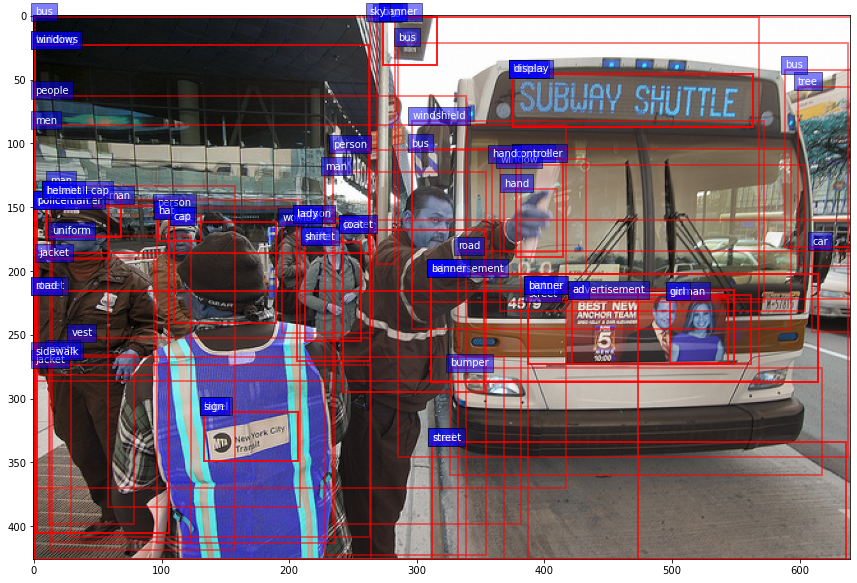

In [24]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize = (40,10))

im = cv2.imread('/scratch/nikolai/val2014/COCO_val2014_000000010014.jpg')
plt.imshow(im)

for i in range(len(boxes)):
    bbox = boxes[i]
    if bbox[0] == 0:
        bbox[0] = 1
    if bbox[1] == 0:
        bbox[1] = 1
    cls = classes[out.item()['objects'][i] + 1]
    #if attr_conf[i] > attr_thresh:
    #    cls = attributes[attr[i]+1] + " " + cls
    plt.gca().add_patch(
        plt.Rectangle((bbox[0], bbox[1]),
                      bbox[2] - bbox[0],
                      bbox[3] - bbox[1], fill=False,
                      edgecolor='red', linewidth=2, alpha=0.5)
            )
    plt.gca().text(bbox[0], bbox[1] - 2,
                '%s' % (cls),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=10, color='white')
